### 使用 Logistic Regression 判斷特徵值

#### 1. 載入資料

In [1]:
import pandas as pd

sheets_dict = pd.read_excel('motion_12.xlsx', sheet_name = None)
data_df = pd.DataFrame()
for name, sheet in sheets_dict.items():
    data = pd.read_excel('motion_12.xlsx', sheet_name = name)
    columns = data.columns.tolist()
    X = []
    y = name
    for index, value in enumerate(columns):
        if index == 0:
            pass
        else:
            X.append(data[value][99:].values)
    for index, value in enumerate(X):
        X_df = pd.DataFrame(value).T
        X_df['y'] = y
        data_df = data_df.append(X_df)
data_df = data_df.reset_index(drop=True)

#### 2.資料前處理

In [2]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y = le.fit_transform(data_df.y.values)
data_df = data_df.drop(columns= 'y', axis = 1)
data_df = data_df.fillna(0)
X = data_df[list(range(0, 1043))].values

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X_norm = scaler.transform(X)

#### 3.演算法實現及結果分析

In [4]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
classes = ['擦白板\n加速度x軸','擦白板\n角速度z軸','輕輕跳躍\n加速度y軸','用力跳躍\n加速度y軸','輕輕跳躍\n角速度x軸','用力跳躍\n角速度x軸','蹲下右手撿東西\n角速度x軸','向前走\n加速度y軸','倒退走\n加速度y軸','上樓梯\n加速度y軸','下樓梯\n加速度y軸']

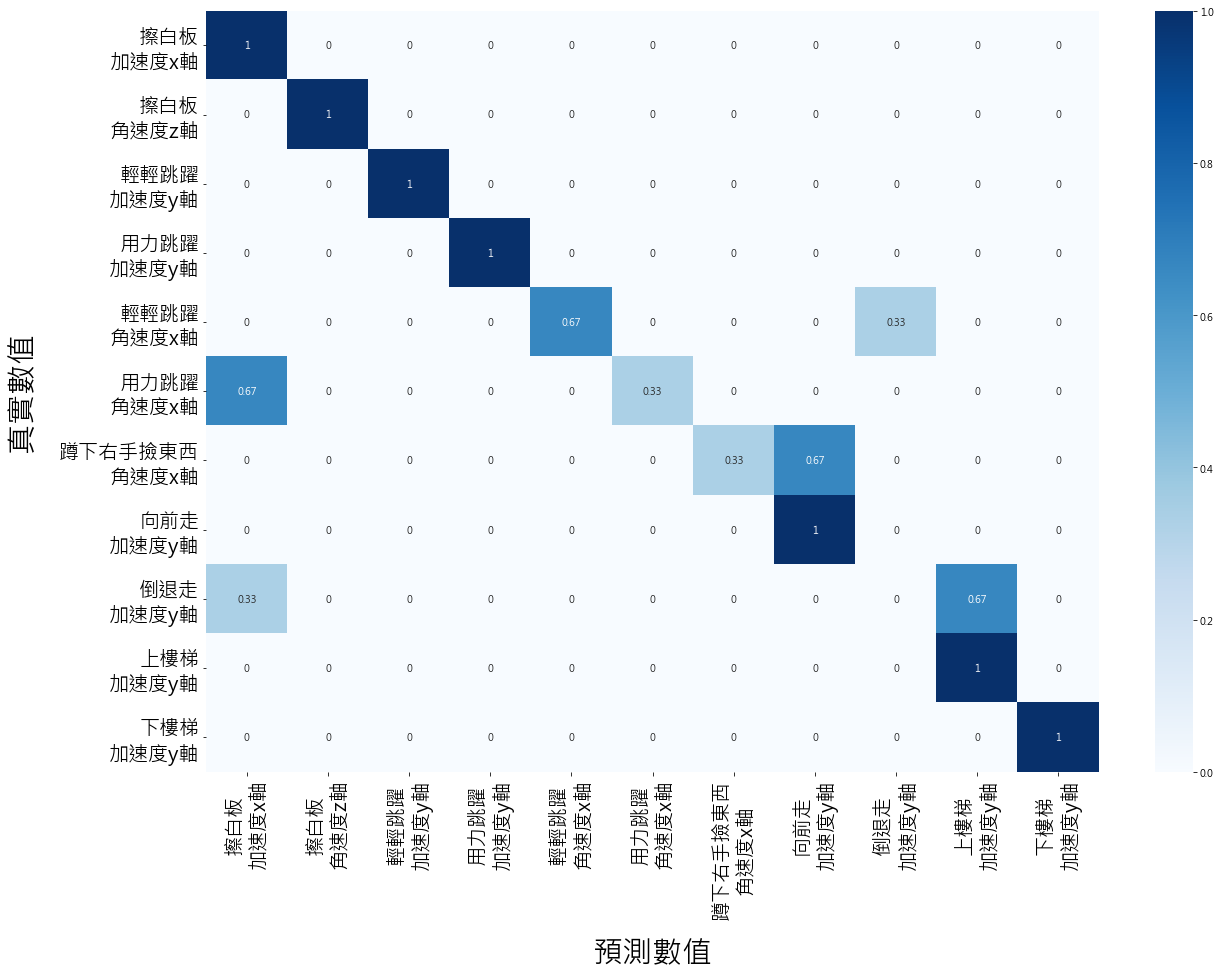

Accuracy: 0.75 (+/- 0.18)


In [15]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, penalty = 'l2', solver = 'newton-cg')
scores = cross_val_score(clf, X, y, cv=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

plt.rcParams['font.sans-serif']=['Microsoft JhengHei']
cm = confusion_matrix(y_test, y_pred)
cm_nor = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm_nor, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure(figsize = (20, 14))
sn.heatmap(df_cm, annot=True, cmap="Blues")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('預測數值', fontsize=30, labelpad=20)
plt.ylabel('真實數值', fontsize=30, labelpad=20)
plt.savefig('LogisticRegression.png', bbox_inches='tight')
plt.show()
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

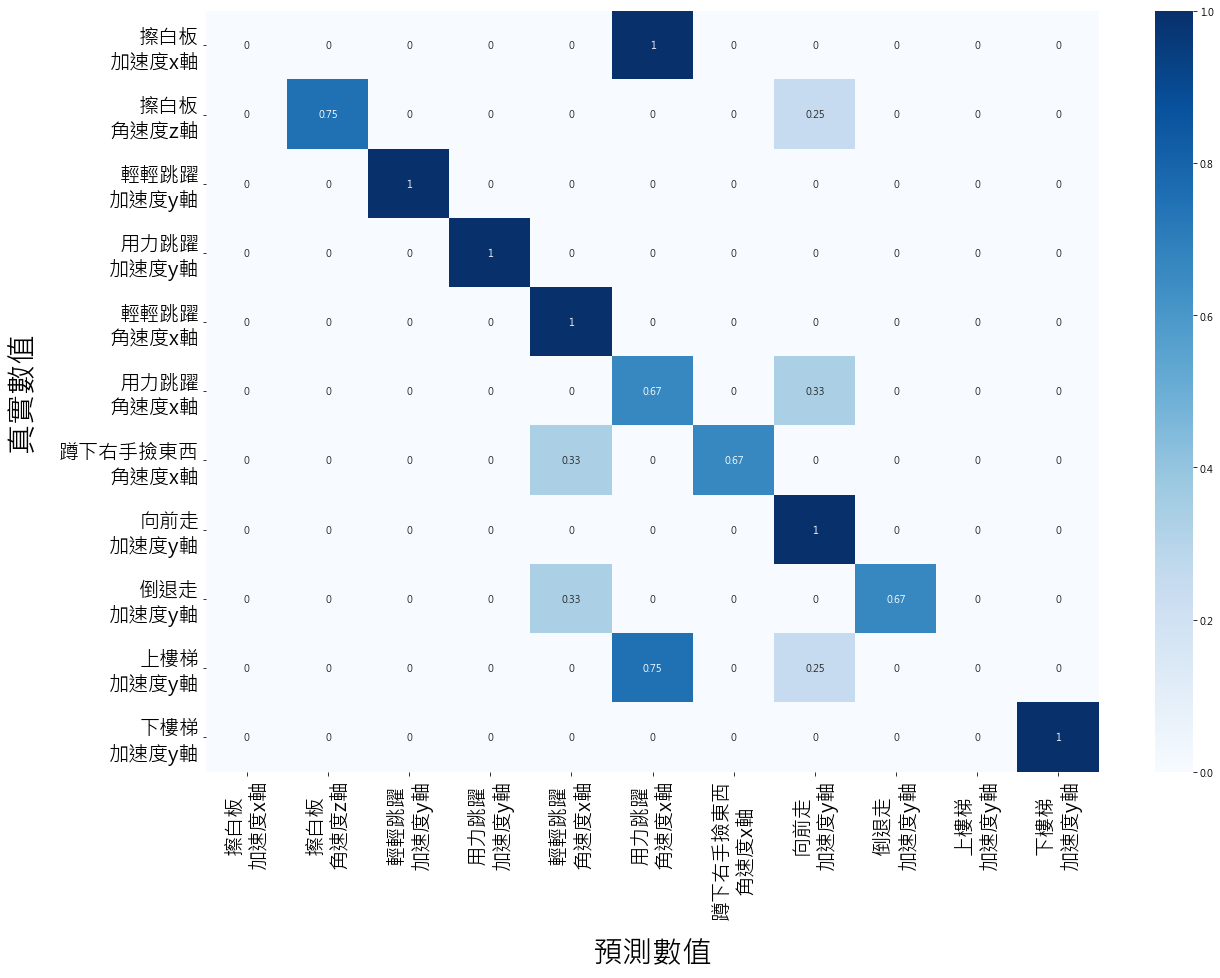

Accuracy: 0.70 (+/- 0.19)


In [16]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
scores = cross_val_score(clf, X, y, cv=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

plt.rcParams['font.sans-serif']=['Microsoft JhengHei']
cm = confusion_matrix(y_test, y_pred)
cm_nor = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm_nor, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure(figsize = (20, 14))
sn.heatmap(df_cm, annot=True, cmap="Blues")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('預測數值', fontsize=30, labelpad=20)
plt.ylabel('真實數值', fontsize=30, labelpad=20)
plt.savefig('SVC.png', bbox_inches='tight')
plt.show()
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

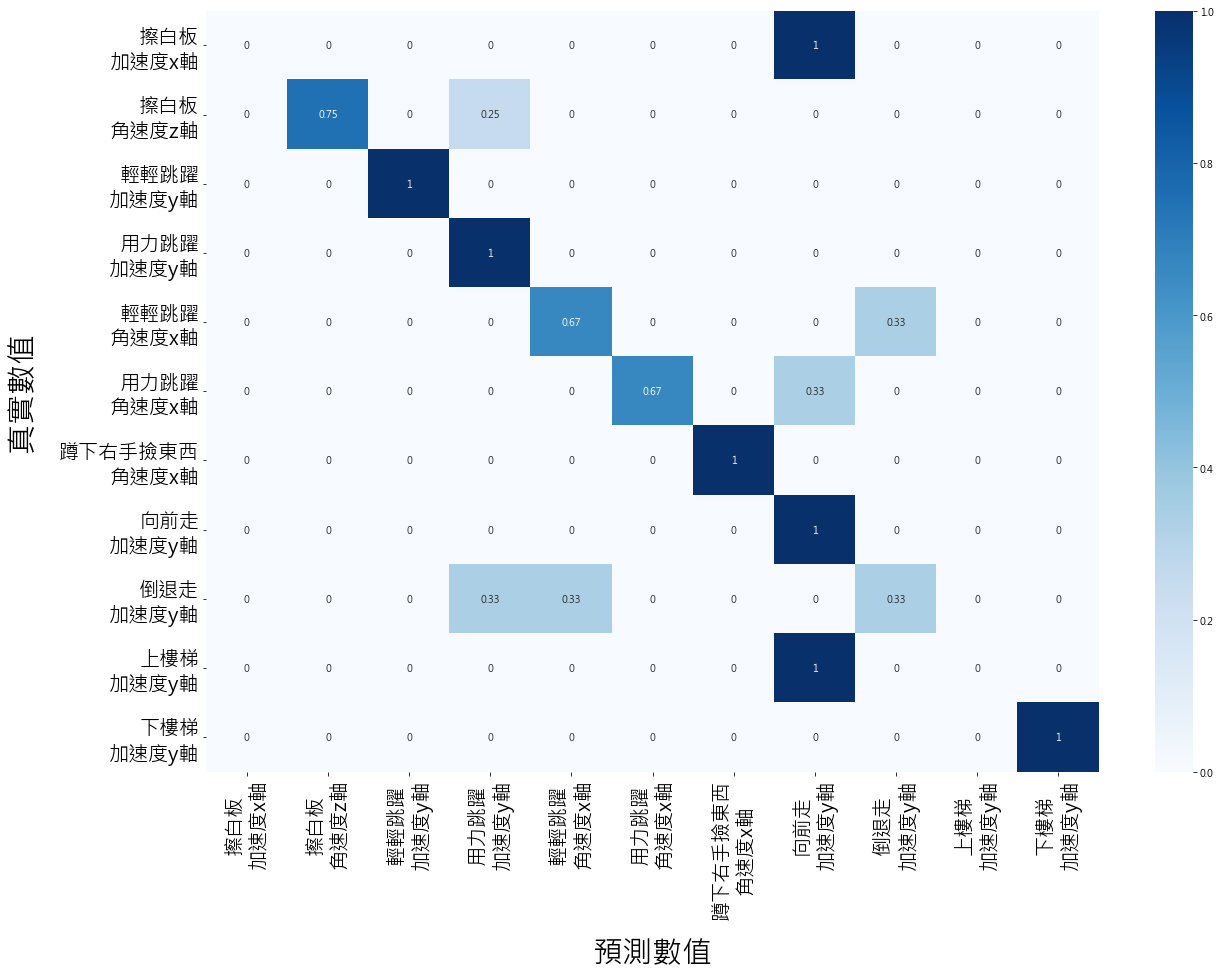

Accuracy: 0.75 (+/- 0.11)


In [17]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

plt.rcParams['font.sans-serif']=['Microsoft JhengHei']
cm = confusion_matrix(y_test, y_pred)
cm_nor = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm_nor, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure(figsize = (20, 14))
sn.heatmap(df_cm, annot=True, cmap="Blues")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('預測數值', fontsize=30, labelpad=20)
plt.ylabel('真實數值', fontsize=30, labelpad=20)
plt.savefig('RandomForest.png', bbox_inches='tight')
plt.show()
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

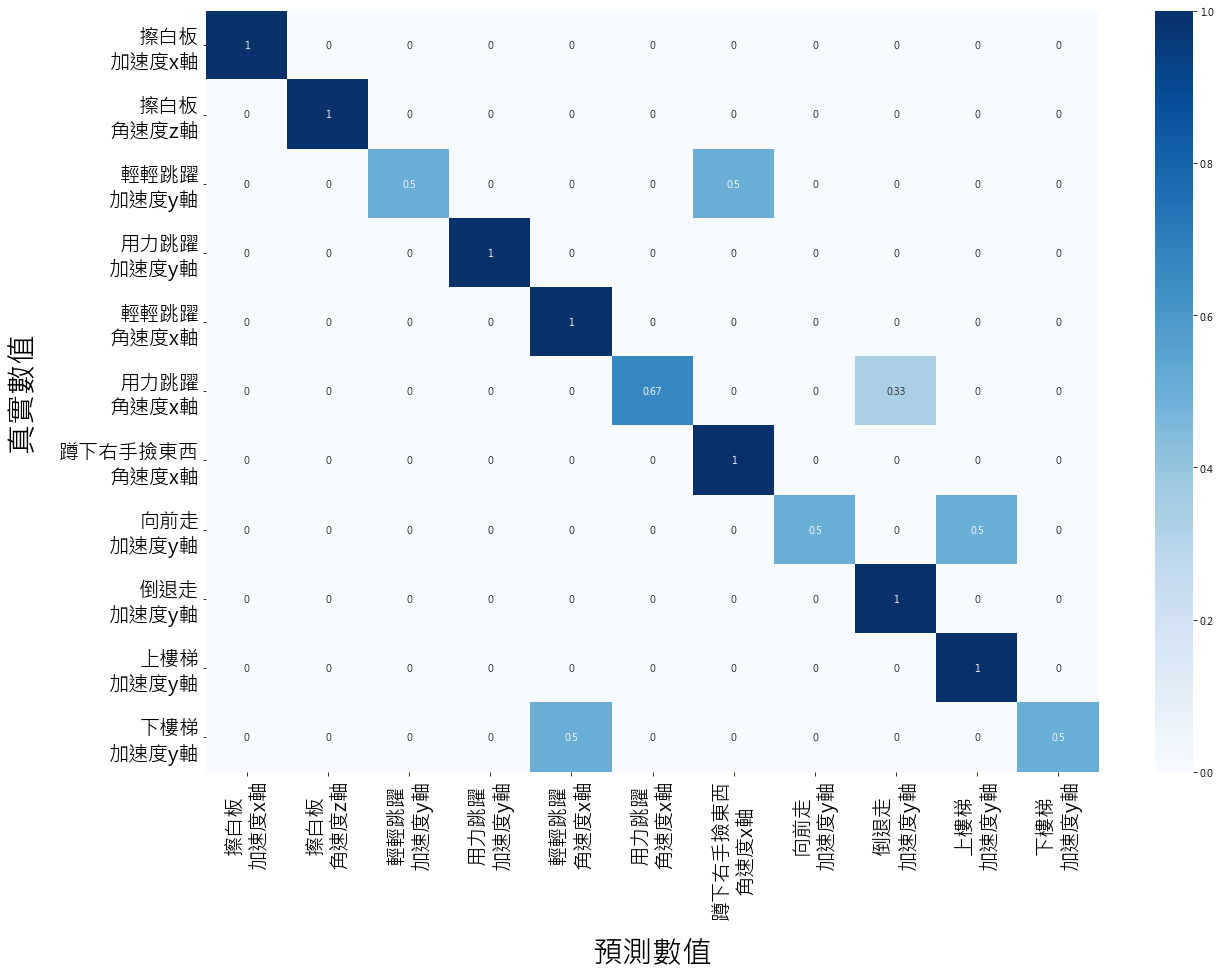

Accuracy: 0.81 (+/- 0.14)


In [18]:
from xgboost import XGBClassifier
clf = XGBClassifier()
scores = cross_val_score(clf, X, y, cv=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

plt.rcParams['font.sans-serif']=['Microsoft JhengHei']
cm = confusion_matrix(y_test, y_pred)
cm_nor = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm_nor, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure(figsize = (20, 14))
sn.heatmap(df_cm, annot=True, cmap="Blues")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('預測數值', fontsize=30, labelpad=20)
plt.ylabel('真實數值', fontsize=30, labelpad=20)
plt.savefig('XGB.png', bbox_inches='tight')
plt.show()
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

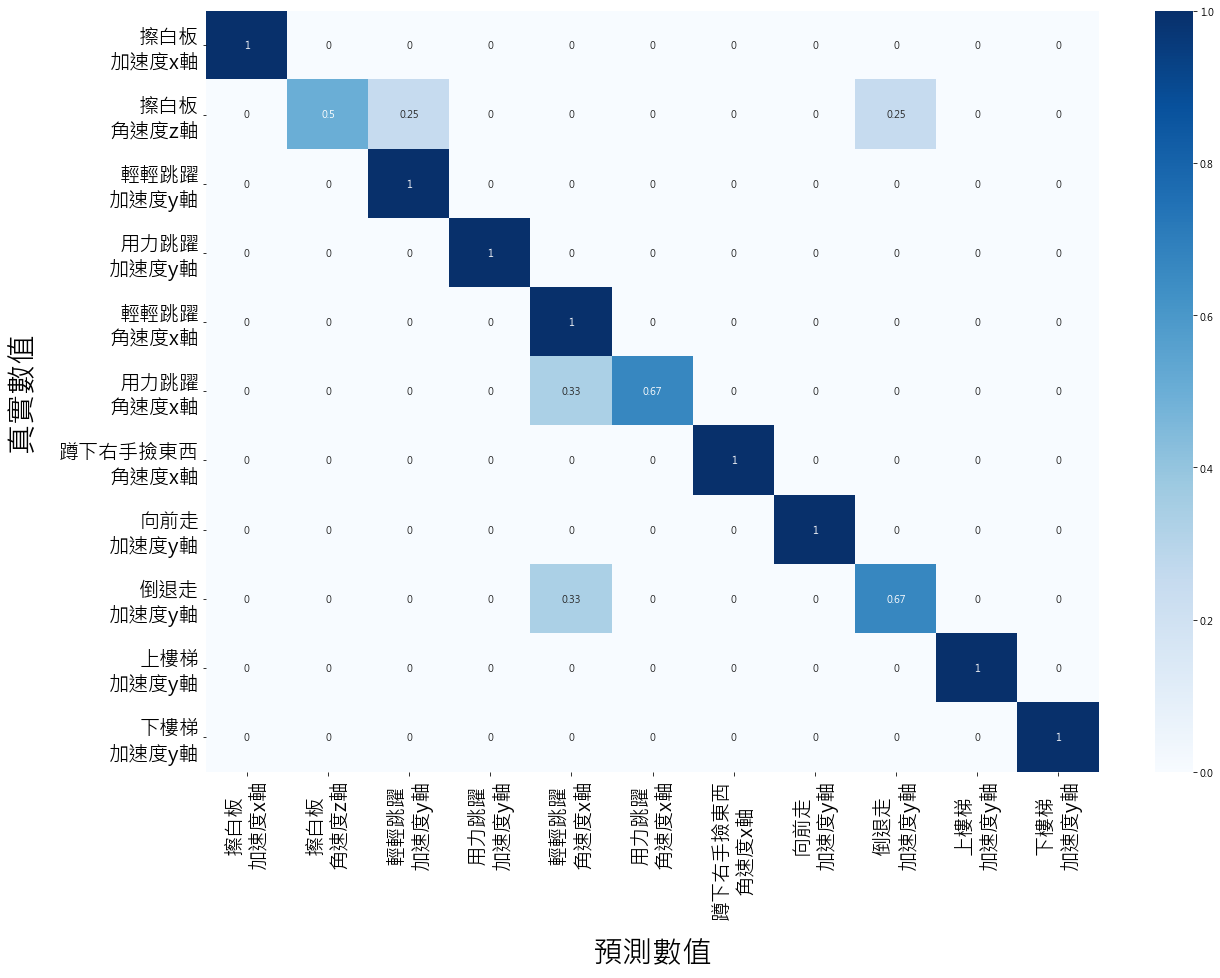

Accuracy: 0.85 (+/- 0.11)


In [19]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier()
scores = cross_val_score(clf, X, y, cv=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

plt.rcParams['font.sans-serif']=['Microsoft JhengHei']
cm = confusion_matrix(y_test, y_pred)
cm_nor = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm_nor, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure(figsize = (20,14))
sn.heatmap(df_cm, annot=True, cmap="Blues")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('預測數值', fontsize=30, labelpad=20)
plt.ylabel('真實數值', fontsize=30, labelpad=20)
plt.savefig('LGBM.png', bbox_inches='tight')
plt.show()
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))